# Re-make $dC_\ell/dw_0$, $dC_\ell/dw_a$ using fiducial $P(k)$ and upper/lower $\chi(z)$

In [1]:
# this version modifies the 2-sided derivatives to use fiducial P(k) for double-sided derivatives,
# but still use \chi_upper(z) and \chi_lower(z) when calculating power spectra

In [2]:
import crosspower as cp
import FisherCl as fcl # branch quickCl
#import noiseCl as ncl
#import camb

# set plotting to be in the notebook instead of its own qt window
%matplotlib inline

IMPORT ERROR: /opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/quicklens/mpi.pyc (No module named pypar). Could not load pbs or pypar. MPI will not be used.


In [3]:
# load FisherMatrix objects
import FisherCl as fcl
import noiseCl as ncl
import crosspower as cp
import pickle

filehandler_lin = open('Fisher_7_16O_wa1.obj','r') # modified for larger Delta_wa
#filehandler_lin = open('Fisher_7_16O.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 40
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version

#filehandler_lin = open('Fisher_7_16N.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version

filehandler_nln = open('Fisher_7_16M_wa1.obj','r') # modified for larger Delta_wa
#filehandler_nln = open('Fisher_7_16M.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 40
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version

#filehandler_nln = open('Fisher_7_16Ln0.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66 ('n0' indicates fix)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version




#filehandler_nln = open('Fisher_7_16Jn0.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66 (in FisherCl)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5

#filehandler_nln = open('Fisher_7_16In0.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 40 (in FisherCl)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5

#filehandler_lin = open('Fisher_7_16Hn0.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66 (in FisherCl)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5

#filehandler_lin = open('Fisher_7_16Gn0.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66 (in FisherCl)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5

Fobj2 = pickle.load(filehandler_lin) 
Fobj4 = pickle.load(filehandler_nln) 


lmin = Fobj2.lmin
lmax = Fobj2.lmax
nBins = Fobj2.nBins
nMaps = Fobj2.nBins + 1
nParams = Fobj2.nParams
nCosParams = Fobj2.nParams - Fobj2.nBins
ells = Fobj2.ells
obsNames = Fobj2.obsNames
paramList = Fobj2.paramList

print Fobj2.obsList
print Fobj2.obsNames
print Fobj2.paramList

print Fobj2.Fij.shape
print Fobj2.FijTE.shape
print Fobj2.nParams
print Fobj2.nCosParams

print Fobj2.lmin
print Fobj2.lmax

lminP = Fobj2.lminP
lmaxP = Fobj2.lmaxP
print lminP,lmaxP

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  54.  55.  56.  57.  58.  59.  60.  61.
  62.  63.  64.  65.  66.  67.  72.  73.  74.  75.  76.  77.  78.  79.
  80.  81.  82.  83.  84.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 144. 145. 146. 147.
 148. 149. 150. 151. 152. 162. 163. 164. 165. 166. 167. 168. 169. 180.
 181. 182. 183. 184. 185. 186. 198. 199. 200. 201. 202. 203. 216. 217.
 218. 219. 220. 234. 235. 236. 237. 252. 253. 254. 270. 271. 288.]
['k,k', 'k,g1', 'k,g2', 'k,g3', 'k,g4', 'k,g5', 'k,g6', 'k,g7', 'k,g8', 'k,g9', 'k,g10', 'k,g11', 'k,g12', 'k,g13', 'k,g14', 'k,g15', 'k,g16', 'g1,g1', 'g1,g2', 'g1,g3', 'g1,g4', 'g1,g5', 'g1,g6', 'g1,g7', 'g1,g8', 'g1,g9',

In [4]:
# get copies of the derivatives from the objects
crossClsPlus2 = np.copy(Fobj2.crossClsPlus)
crossClsMinus2 = np.copy(Fobj2.crossClsMinus)
crossClsPPlus2 = np.copy(Fobj2.crossClsPPlus)
crossClsPMinus2 = np.copy(Fobj2.crossClsPMinus)
dClVecs2 = np.copy(Fobj2.dClVecs)
dClVecsP2 = np.copy(Fobj2.dClVecsP)

crossClsPlus4 = np.copy(Fobj4.crossClsPlus)
crossClsMinus4 = np.copy(Fobj4.crossClsMinus)
crossClsPPlus4 = np.copy(Fobj4.crossClsPPlus)
crossClsPMinus4 = np.copy(Fobj4.crossClsPMinus)
dClVecs4 = np.copy(Fobj4.dClVecs)
dClVecsP4 = np.copy(Fobj4.dClVecsP)

print crossClsPlus2.shape,crossClsPlus4.shape
print crossClsMinus2.shape,crossClsMinus4.shape
print dClVecs2.shape, dClVecs4.shape

print crossClsPPlus2.shape,crossClsPPlus4.shape
print crossClsPMinus2.shape,crossClsPMinus4.shape
print dClVecsP2.shape, dClVecsP4.shape

(17, 17, 9, 2999) (17, 17, 9, 2999)
(17, 17, 9, 2999) (17, 17, 9, 2999)
(153, 25, 2999) (153, 25, 2999)
(2, 2, 9, 4999) (2, 2, 9, 4999)
(2, 2, 9, 4999) (2, 2, 9, 4999)
(3, 9, 4999) (3, 9, 4999)


In [5]:
nMapsP = 2 # should match above

# Re-make w derivatives

In [6]:
import camb 

# get MatterPower objects
# get params for MatterPower from FisherMatrix:
def getPk(Fobj):
    return cp.MatterPower(nz=Fobj.nz,AccuracyBoost=Fobj.AccuracyBoost,nonlinear=Fobj.nonlinear,**Fobj.cosParams)
def getWin(Fobj,myPk):
    return cp.Window(myPk,zmin=Fobj.zmin,zmax=Fobj.zmax,nBins=Fobj.nBins,
               biasK=cp.ones,biasG=cp.byeBias,dndzMode=Fobj.dndzMode,z0=Fobj.z0,
               doNorm=Fobj.doNorm,useWk=Fobj.useWk,BPZ=Fobj.BPZ,binSmooth=Fobj.binSmooth,
               biasByBin=Fobj.biasByBin)

# set Halofit version
print 'setting Halofit to Casarini (Halofit ver. 7)'
camb.set_halofit_version('casarini')

print 'get linear P(k)...'
myPk2 = getPk(Fobj2)
print 'get nonlinear P(k)...'
myPk4 = getPk(Fobj4)

#chiOfZ2 = myPk2.getChiofZ()
#chiOfZ4 = myPk4.getChiofZ()

print 'done.'

setting Halofit to Casarini (Halofit ver. 7)
get linear P(k)...
neutrino_hierarchy =  degenerate
starting makePkInterp.


finishing makePkInterp.
get nonlinear P(k)...
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
done.


In [7]:
print Fobj2.dndzMode,Fobj4.dndzMode
print Fobj2.nonlinear,Fobj4.nonlinear

2 2
False True


In [8]:
print paramList
print paramList[7:9]
for cParamNum in range(7,9):
    print paramList[cParamNum]

['ombh2', 'omch2', 'cosmomc_theta', 'As', 'ns', 'tau', 'mnu', 'w', 'wa', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10', 'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16']
['w', 'wa']
w
wa


In [9]:
# grab some code from FisherCl
tophatBins = True
AccuracyBoost = 3
lpa = 5.0 # set_for_lmax also sets lensing 
#get the total lensed CMB power spectra versus unlensed
#myClName = 'total'
myClName = 'unlensed_scalar'

# parameters list:
# step sizes for discrete derivatives: must correspond to paramList entries!
#   from Allison et. al. (2015) Table III.
nCosParams = 9 # 6 LCDM + Mnu + w0 + wa
paramList = ['ombh2','omch2','cosmomc_theta',  'As', 'ns','tau','mnu', 'w', 'wa']
#deltaP =    [ 0.0008, 0.0030,      0.0050e-2,0.1e-9,0.010,0.020,0.020,0.05,0.025] #mnu one in eV
deltaP =    [ 0.0008, 0.0030,      0.0050e-2,0.1e-9,0.010,0.020,0.020,0.05,  0.1] #mnu one in eV

# cut deltaP in half to match Byeonghee's step sizes
deltaP = np.array(deltaP)/2.0
    

print 'creating modified parameter lists . . . '
myParams = Fobj2.cosParams
myParamsUpper = []
myParamsLower = []
for cParamNum in range(nCosParams):
  # add parameter dictionary to lists; HAVE TO BE COPIES!!!
  myParamsUpper.append(myParams.copy())
  myParamsLower.append(myParams.copy())
  # modify parameter number cParamNum in ditionaries
  myParamsUpper[cParamNum][paramList[cParamNum]] += deltaP[cParamNum]
  myParamsLower[cParamNum][paramList[cParamNum]] -= deltaP[cParamNum]


creating modified parameter lists . . . 


In [10]:
# grab some code from FisherCl and crosspower and modify it to use fiducial P(k) in integrals
from scipy.interpolate import UnivariateSpline

def getCl(myPk,myPk2,myWin,binNum1=0,binNum2=0,cor1=cp.Window.kappa,cor2=cp.Window.kappa,
          lmin=2,lmax=2500,useInterp=True):
  """
    Purpose: get angular power spectrum
    Inputs:
      myPk: a MatterPower object; the one for chi(z)
      myPk2: the one that P(k,z) is taken from
      myWin: a Window object that was made with the same MatterPower object (myPk)
      binNum1,binNum2: index indicating which bin to use
        If myWin.dndzMode = 1:
          integer in {0,1,2,3,4,5}
          curves from fig.3 of Crocce et al 2016.
        if myWin.dndzMode = 2:
          integer in {0,1,...,nBins-1,nBins}
        Index=0 indicates sum of all other curves
      cor1,cor2: the names of the two fields to cross-correlate
        must be Window.kappa or Window.galaxies
        Default: Window.kappa
      lmin,lmax: lowest,highest ell to return.
      useInterp: set to true to only do some ell values, and interpolate
        the rest
        Default: True
    Modification:
      Modified to take two input MatterPower objects, and use one for chi(z), the other for P(k,z); ZK, 2018.07.26
    Returns: 
      ell,  the ell values (same length as Cl array)
      Cl, the power spectrum array
  """

  # confirm inputs
  def wincheck(winfunc,num):
    if winfunc == cp.Window.kappa:
      if num == 1:
        print 'window ',num,': kappa ',binNum1
      else:
        print 'window ',num,': kappa ',binNum2
    elif winfunc == cp.Window.galaxies:
      if num == 1:
        print 'window ',num,': galaxies ',binNum1
      else:
        print 'window ',num,': galaxies ',binNum2
    else:
      print 'error with input'
      return 0
    return 1
  
  if wincheck(cor1,1)==0: return 0,0
  if wincheck(cor2,2)==0: return 0,0
  
  # get matter power spectrum P_k^delta
  PK,chistar,chis,dchis,zs,dzs,pars = myPk.getPKinterp()
  PK2,chistar2,chis2,dchis2,zs2,dzs2,pars2 = myPk2.getPKinterp()

  # get window functions
  winFunc1=cor1(myWin,binNum1)
  winFunc2=cor2(myWin,binNum2)
  win1 = winFunc1(zs)
  win2 = winFunc2(zs)

  #Do integral over chi
  if useInterp and lmax <= 3000:
    # define ell values to be used 
    #   (same used in notebook "getCl interpolation testing")
    ells1 = np.arange(10)*2+10
    ells2 = np.arange(4)*5+30
    ells3 = np.arange(5)*10+50
    ells4 = np.arange(20)*25+100
    ells5 = np.arange(20)*70+600
    ells6 = np.arange(11)*100+2000 # switch 11 to 31 to extend from 3000 to 5000
    ellsSet = np.append(ells1,np.append(ells2,np.append(ells3,
        np.append(ells4,np.append(ells5,ells6)))))
    #print 'ell set: ',ellsSet
  else:
    if lmax > 3000:
        print 'warning! lmax>3000 found; Cl interpolation not being done.'
    ellsSet = np.arange(lmin,lmax+1, dtype=np.float64)

  Cells = np.zeros(ellsSet.shape)
  w = np.ones(chis.shape) #this is just used to set to zero k values out of range
  for i, l in enumerate(ellsSet):
    k=(l+0.5)/chis
    w[:]=1
    w[k<1e-4]=0
    w[k>=myPk.kmax]=0
    #Cells[i] = np.dot(dchis, w*PK.P(zs, k, grid=False)*win1*win2/(chis**2))
    Cells[i] = np.dot(dchis, w*PK2.P(zs, k, grid=False)*win1*win2/(chis**2))

  if useInterp:
    ls = np.arange(lmin,lmax+1, dtype=np.float64)
    y_spl = UnivariateSpline(ellsSet,Cells,s=0,k=4)
    cl = y_spl(ls)   
  else:
    ls = ellsSet
    cl = Cells

  return ls, cl


def getCrossCls(paramList,myParams,myPk,lmin,lmax,nBins,Fobj,tophatBins=True):
    """
        Purpose:
            get the crossCls for kappa, galaxies
        Inputs:
            paramList: like FisherMatrix.paramList, but only contains parameter
                names for those which are to be varied
                Note: a list of length 1 will cause a differently shaped array 
                to be returned
            myParams: a list of lists of parameters like FisherMatrix.cosParams
                This list must have the same length as paramList
            myPk: a MatterPower object

            nBins: number of redshift bins being used (should be nMaps-1)
            lmin,lmax: min,max ell value to use
            Fobj: contains various settings to copy
            tophatBins: set to True to use tophat-shaped, non-overlapping bins
        Modification:
            Pulled out of FisherCl.FisherMatrix; modified to use two cp.MatterPower objects; 
                Added Fobj to parameter list since not part of an object anymore; ZK,2018.07.26
        Returns:
            crossCls: numpy array of shape (nMaps,nMaps,nCosParams,lmax)
              unless the lenth of paramList is 1, then shape will be 
              (nMaps,nMaps,lmax)
    """
    nCosParams = paramList.__len__()
    nMaps = nBins+1

    crossCls = np.zeros((nMaps,nMaps,nCosParams,lmax-lmin+1))
    for cParamNum in range(nCosParams):
        print 'calculating MatterPower and Window objects for ',\
              paramList[cParamNum], ' derivative . . . '

        myPks = cp.MatterPower(nz=Fobj.nz,AccuracyBoost=Fobj.AccuracyBoost,
                               nonlinear=Fobj.nonlinear,**myParams[cParamNum])
        # myWins should use the MatterPower object that goes into the first position in getCl
        #myWins = cp.Window(myPk,zmin=Fobj.zmin,zmax=Fobj.zmax,
        myWins = cp.Window(myPks,zmin=Fobj.zmin,zmax=Fobj.zmax,
                           nBins=Fobj.nBins,biasK=cp.ones,biasG=cp.byeBias,
                           dndzMode=Fobj.dndzMode,z0=Fobj.z0,doNorm=Fobj.doNorm,
                           useWk=Fobj.useWk,BPZ=Fobj.BPZ,
                           binSmooth=Fobj.binSmooth,biasByBin=Fobj.biasByBin)

        # save pars for use in primary CMB
        # it would be nice to restore this functionality 
        #  but global DE settings make this hard
        #myParsUpper.append(myPksUpper.pars)
        #myParsLower.append(myPksLower.pars)

        for map1 in range(nMaps):
          if map1==0:
            cor1 = cp.Window.kappa
          else:
            cor1 = cp.Window.galaxies
          for map2 in range(map1,nMaps):
            print '  starting angular cross power spectrum ',map1,', ',map2,'... '
            if map2==0:
              cor2 = cp.Window.kappa
            else:
              cor2 = cp.Window.galaxies
            # since nonoverlapping bins have zero correlation use this condition:
            if map1==0 or map1==map2 or not tophatBins:
              #ells,Cls = cp.getCl(myPks,myWins,binNum1=map1,binNum2=map2,
              #                    cor1=cor1,cor2=cor2,lmin=lmin,lmax=lmax)
                
              # modified to use first Pk argument for chi(z), second for P(k)
              ells,Cls = getCl(myPks,myPk,myWins,binNum1=map1,binNum2=map2,
                                  cor1=cor1,cor2=cor2,lmin=lmin,lmax=lmax)
              # now reversed:
              #ells,Cls = getCl(myPk,myPks,myWins,binNum1=map1,binNum2=map2,
              #                    cor1=cor1,cor2=cor2,lmin=lmin,lmax=lmax)
              
              crossCls[map1,map2,cParamNum] = Cls
              crossCls[map2,map1,cParamNum] = Cls #symmetric

        # ditch the MatterPower and Window objects - wait, isn't this automatic?
        del myPks
        del myWins

    # reshape for unperterbed version
    if nCosParams == 1:
        crossCls = np.reshape(crossCls,(nMaps,nMaps,lmax-lmin+1))
    return crossCls



In [11]:
# get the perturbed versions
#print 'starting upper spectra for numeric derivatives . . . '
#crossClsPlus_ww2 = Fobj2.getCrossCls(paramList[7:9],myParamsUpper[7:9],
#                                     myPk2,
#                                     lmin,lmax,nBins,tophatBins=tophatBins)    
#print 'starting lower spectra for numeric derivatives . . . '
#crossClsMinus_ww2 = Fobj2.getCrossCls(paramList[7:9],myParamsLower[7:9],
#                                      myPk2,
#                                      lmin,lmax,nBins,tophatBins=tophatBins)

# get the perturbed versions
print 'starting upper spectra for numeric derivatives . . . '
crossClsPlus_ww2 = getCrossCls(paramList,myParamsUpper,
                               myPk2,
                               lmin,lmax,nBins,Fobj2,tophatBins=tophatBins)    
print 'starting lower spectra for numeric derivatives . . . '
crossClsMinus_ww2 = getCrossCls(paramList,myParamsLower,
                                myPk2,
                                lmin,lmax,nBins,Fobj2,tophatBins=tophatBins)

print 'done.'

starting upper spectra for numeric derivatives . . . 
calculating MatterPower and Window objects for  ombh2  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

calculating MatterPower and Window objects for  omch2  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

calculating MatterPower and Window objects for  cosmomc_theta  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

calculating MatterPower and Window objects for  As  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

calculating MatterPower and Window objects for  ns  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

calculating MatterPower and Window objects for  tau  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

calculating MatterPower and Window objects for  mnu  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

calculating MatterPower and Window objects for  w  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.99

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

calculating MatterPower and Window objects for  wa  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

starting lower spectra for numeric derivatives . . . 
calculating MatterPower and Window objects for  ombh2  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

calculating MatterPower and Window objects for  omch2  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

calculating MatterPower and Window objects for  cosmomc_theta  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

calculating MatterPower and Window objects for  As  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

calculating MatterPower and Window objects for  ns  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

calculating MatterPower and Window objects for  tau  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

calculating MatterPower and Window objects for  mnu  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

calculating MatterPower and Window objects for  w  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.99

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

calculating MatterPower and Window objects for  wa  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

In [12]:
"""
lminP = Fobj2.lminP
print lminP
lmaxP = Fobj2.lmaxP
print lmaxP
"""

'\nlminP = Fobj2.lminP\nprint lminP\nlmaxP = Fobj2.lmaxP\nprint lmaxP\n'

In [13]:
"""
print 'starting upper spectra for numeric derivatives . . . '
crossClsPPlus_ww2  = Fobj2.getCrossClsP(paramList[7:9],myParamsUpper[7:9],
                                   myPk2,
                                   nMaps=nMapsP,lmax=lmaxP,lpa=lpa,
                                   myClName=myClName,
                                   AccuracyBoost=AccuracyBoost)
print 'starting lower spectra for numeric derivatives . . . '
crossClsPMinus_ww2 = Fobj2.getCrossClsP(paramList[7:9],myParamsLower[7:9],
                                   myPk2,
                                   nMaps=nMapsP,lmax=lmaxP,lpa=lpa,
                                   myClName=myClName,
                                   AccuracyBoost=AccuracyBoost)

print 'done.'
"""

"\nprint 'starting upper spectra for numeric derivatives . . . '\ncrossClsPPlus_ww2  = Fobj2.getCrossClsP(paramList[7:9],myParamsUpper[7:9],\n                                   myPk2,\n                                   nMaps=nMapsP,lmax=lmaxP,lpa=lpa,\n                                   myClName=myClName,\n                                   AccuracyBoost=AccuracyBoost)\nprint 'starting lower spectra for numeric derivatives . . . '\ncrossClsPMinus_ww2 = Fobj2.getCrossClsP(paramList[7:9],myParamsLower[7:9],\n                                   myPk2,\n                                   nMaps=nMapsP,lmax=lmaxP,lpa=lpa,\n                                   myClName=myClName,\n                                   AccuracyBoost=AccuracyBoost)\n\nprint 'done.'\n"

In [14]:
# set Halofit version
#print 'setting Halofit to Casarini (Halofit ver. 7)'
#camb.set_halofit_version('casarini')

print 'starting upper spectra for numeric derivatives . . . '
crossClsPlus_ww4 = getCrossCls(paramList,myParamsUpper,
                               myPk4,
                               lmin,lmax,nBins,Fobj4,tophatBins=tophatBins)    
print 'starting lower spectra for numeric derivatives . . . '
crossClsMinus_ww4 = getCrossCls(paramList,myParamsLower,
                                myPk4,
                                lmin,lmax,nBins,Fobj4,tophatBins=tophatBins)

print 'done.'

starting upper spectra for numeric derivatives . . . 
calculating MatterPower and Window objects for  ombh2  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

calculating MatterPower and Window objects for  omch2  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

calculating MatterPower and Window objects for  cosmomc_theta  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

calculating MatterPower and Window objects for  As  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

calculating MatterPower and Window objects for  ns  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

calculating MatterPower and Window objects for  tau  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

calculating MatterPower and Window objects for  mnu  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

calculating MatterPower and Window objects for  w  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.99

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

calculating MatterPower and Window objects for  wa  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

starting lower spectra for numeric derivatives . . . 
calculating MatterPower and Window objects for  ombh2  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

calculating MatterPower and Window objects for  omch2  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

calculating MatterPower and Window objects for  cosmomc_theta  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

calculating MatterPower and Window objects for  As  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

calculating MatterPower and Window objects for  ns  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

calculating MatterPower and Window objects for  tau  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

calculating MatterPower and Window objects for  mnu  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

calculating MatterPower and Window objects for  w  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.99

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

calculating MatterPower and Window objects for  wa  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

In [15]:
# set Halofit version
#print 'setting Halofit to Casarini (Halofit ver. 7)'
#camb.set_halofit_version('casarini')
"""
print 'starting upper spectra for numeric derivatives . . . '
crossClsPPlus_ww4  = Fobj4.getCrossClsP(paramList[7:9],myParamsUpper[7:9],
                                   myPk4,
                                   nMaps=nMapsP,lmax=lmaxP,lpa=lpa,
                                   myClName=myClName,
                                   AccuracyBoost=AccuracyBoost)
print 'starting lower spectra for numeric derivatives . . . '
crossClsPMinus_ww4 = Fobj4.getCrossClsP(paramList[7:9],myParamsLower[7:9],
                                   myPk4,
                                   nMaps=nMapsP,lmax=lmaxP,lpa=lpa,
                                   myClName=myClName,
                                   AccuracyBoost=AccuracyBoost)

print 'done.'
"""

"\nprint 'starting upper spectra for numeric derivatives . . . '\ncrossClsPPlus_ww4  = Fobj4.getCrossClsP(paramList[7:9],myParamsUpper[7:9],\n                                   myPk4,\n                                   nMaps=nMapsP,lmax=lmaxP,lpa=lpa,\n                                   myClName=myClName,\n                                   AccuracyBoost=AccuracyBoost)\nprint 'starting lower spectra for numeric derivatives . . . '\ncrossClsPMinus_ww4 = Fobj4.getCrossClsP(paramList[7:9],myParamsLower[7:9],\n                                   myPk4,\n                                   nMaps=nMapsP,lmax=lmaxP,lpa=lpa,\n                                   myClName=myClName,\n                                   AccuracyBoost=AccuracyBoost)\n\nprint 'done.'\n"

In [16]:
print crossClsPlus2.shape,crossClsPlus4.shape
print crossClsMinus2.shape,crossClsMinus4.shape
print dClVecs2.shape, dClVecs4.shape

#print crossClsPPlus2.shape,crossClsPPlus4.shape
#print crossClsPMinus2.shape,crossClsPMinus4.shape
#print dClVecsP2.shape, dClVecsP4.shape

print crossClsPlus_ww2.shape,crossClsPlus_ww4.shape
print crossClsMinus_ww2.shape,crossClsMinus_ww4.shape

#print crossClsPPlus_ww2.shape,crossClsPPlus_ww4.shape
#print crossClsPMinus_ww2.shape,crossClsPMinus_ww4.shape


(17, 17, 9, 2999) (17, 17, 9, 2999)
(17, 17, 9, 2999) (17, 17, 9, 2999)
(153, 25, 2999) (153, 25, 2999)
(17, 17, 9, 2999) (17, 17, 9, 2999)
(17, 17, 9, 2999) (17, 17, 9, 2999)


In [17]:
# grab some code from FisherCl
nMapsP = 2 #probably


# get derivatives wrt parameters
print 'starting creation of C_l derivatives... '

# get dC_l^munu/da_i (one vector of derivatives of C_ls for each param a_i)
# store as matrix with additional dimension for a_i)
# uses same (shortened) nCls as self.covar and self.obsList
nCls = nMaps*(nMaps+1)/2
#self.dClVecs = np.empty((nCls, self.nParams, lmax-lmin+1))
#Clzeros = np.zeros(lmax-lmin+1) # for putting into dClVecs when needed
for map1 in range(nMaps):
  print 'starting derivative set ',map1+1,' of ',nMaps,'... '
  for map2 in range(map1,nMaps):
    mapIdx  = map1*nMaps+map2 -map1*(map1+1)/2  
                               # mapIdx = map index
    # don't need dCl/db for this (omitted)
    
    # next do numerical derivs wrt nuLCDM params
    for pIdx in range(nCosParams):
      #for pIdx in range(7,9):
      #dClPlus  = crossClsPlus_ww2[map1,map2,pIdx-7]
      #dClMinus = crossClsMinus_ww2[map1,map2,pIdx-7]
      dClPlus  = crossClsPlus_ww2[map1,map2,pIdx]
      dClMinus = crossClsMinus_ww2[map1,map2,pIdx]
      dClVecs2[mapIdx, pIdx] = (dClPlus-dClMinus)/(2*deltaP[pIdx])
      #dClPlus  = crossClsPlus_ww4[map1,map2,pIdx-7]
      #dClMinus = crossClsMinus_ww4[map1,map2,pIdx-7]
      dClPlus  = crossClsPlus_ww4[map1,map2,pIdx]
      dClMinus = crossClsMinus_ww4[map1,map2,pIdx]
      dClVecs4[mapIdx, pIdx] = (dClPlus-dClMinus)/(2*deltaP[pIdx])

nClsP = nMapsP*(nMapsP+1)/2
#dClVecsP = np.empty((nClsP, self.nCosParams, lmaxP-lminP+1))
"""
for map1 in range(nMapsP):
    print 'starting primary CMB derivative set ',map1+1,' of ',nMapsP,'... '
    for map2 in range(map1,nMapsP):
        mapIdx  = map1*nMapsP+map2 -map1*(map1+1)/2  # mapIdx = map index
        #for pIdx in range(nCosParams):
        for pIdx in range(7,9):
            dClPlus  = crossClsPPlus_ww2[map1,map2,pIdx-7,lminP:]
            dClMinus = crossClsPMinus_ww2[map1,map2,pIdx-7,lminP:]
            dClVecsP2[mapIdx, pIdx] = (dClPlus-dClMinus)/(2*deltaP[pIdx])
            dClPlus  = crossClsPPlus_ww4[map1,map2,pIdx-7,lminP:]
            dClMinus = crossClsPMinus_ww4[map1,map2,pIdx-7,lminP:]
            dClVecsP4[mapIdx, pIdx] = (dClPlus-dClMinus)/(2*deltaP[pIdx])
"""
print 'done.'

starting creation of C_l derivatives... 
starting derivative set  1  of  17 ... 
starting derivative set  2  of  17 ... 
starting derivative set  3  of  17 ... 
starting derivative set  4  of  17 ... 
starting derivative set  5  of  17 ... 
starting derivative set  6  of  17 ... 
starting derivative set  7  of  17 ... 
starting derivative set  8  of  17 ... 
starting derivative set  9  of  17 ... 
starting derivative set  10  of  17 ... 
starting derivative set  11  of  17 ... 
starting derivative set  12  of  17 ... 
starting derivative set  13  of  17 ... 
starting derivative set  14  of  17 ... 
starting derivative set  15  of  17 ... 
starting derivative set  16  of  17 ... 
starting derivative set  17  of  17 ... 
done.


# Compare old and new derivative versions

In [18]:
nToPlot = 17 # kk and kg at beginning of array

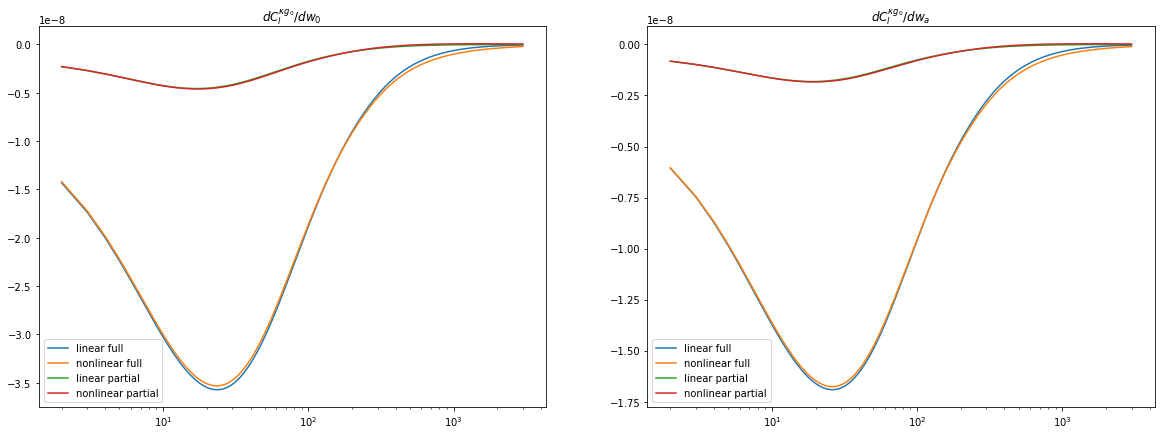

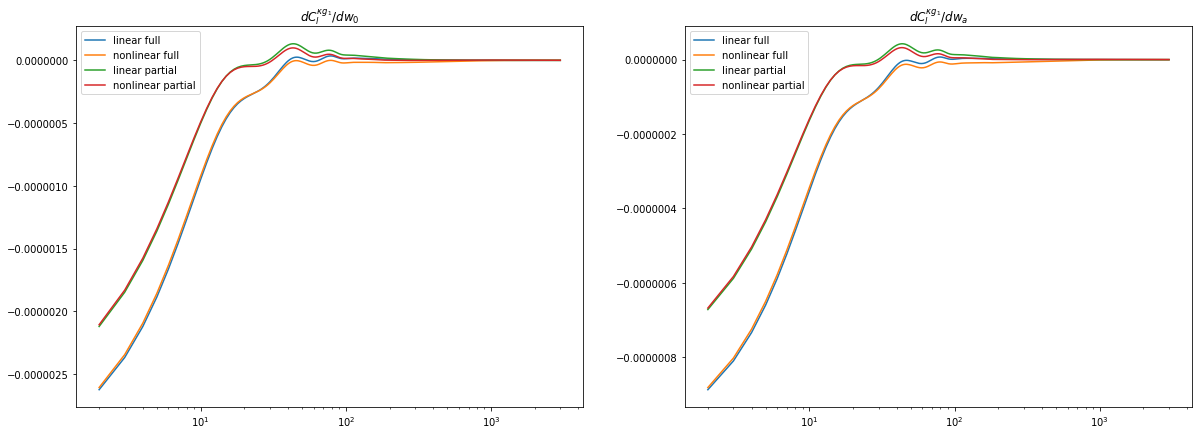

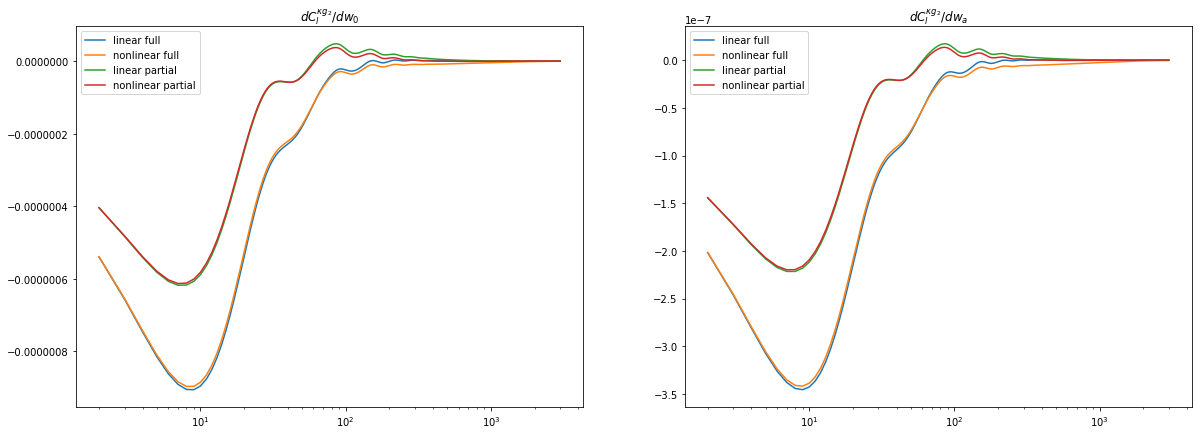

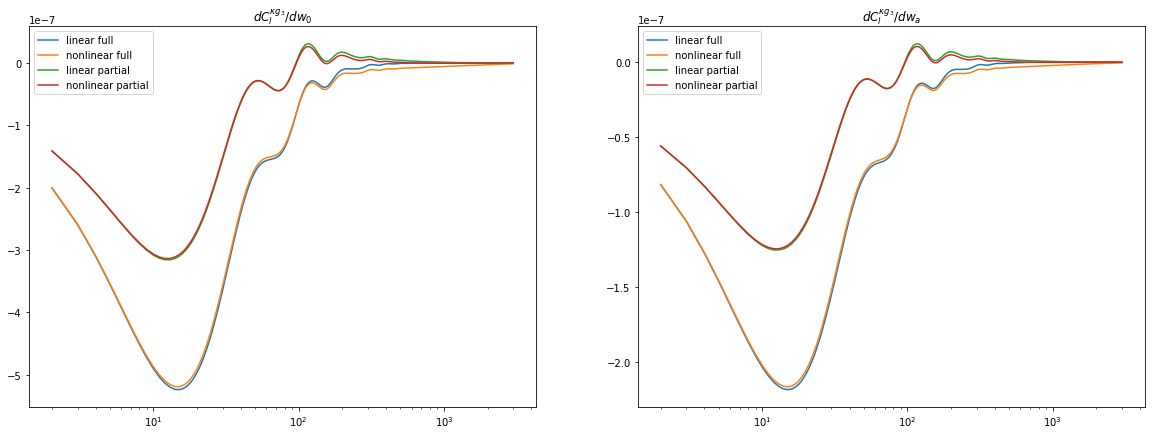

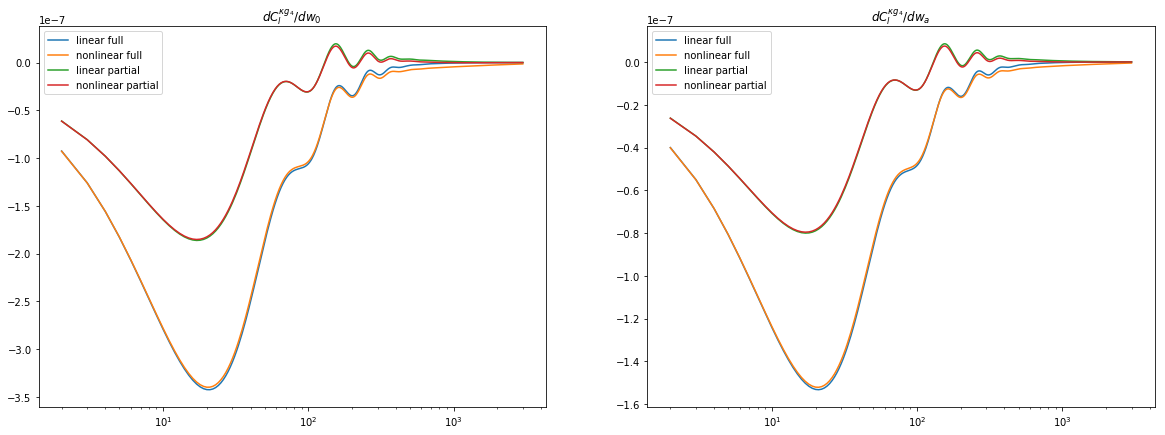

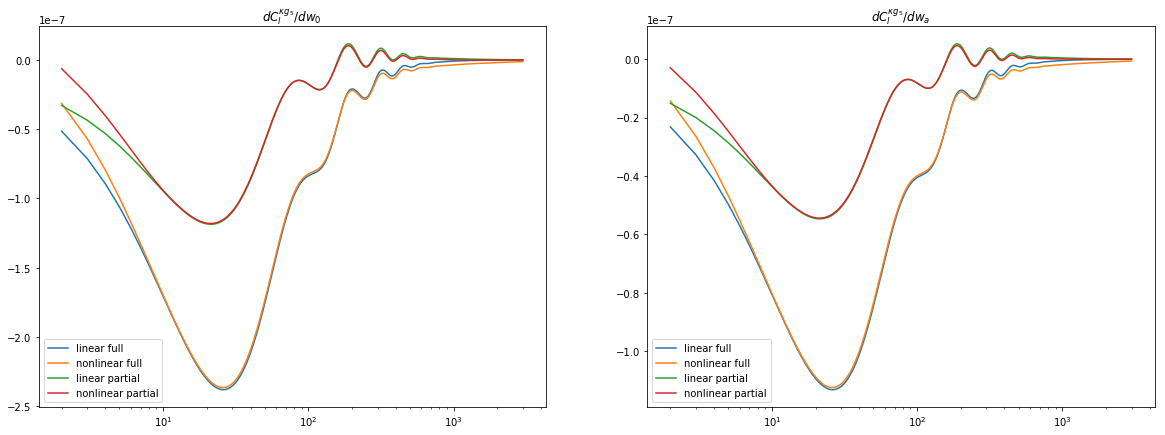

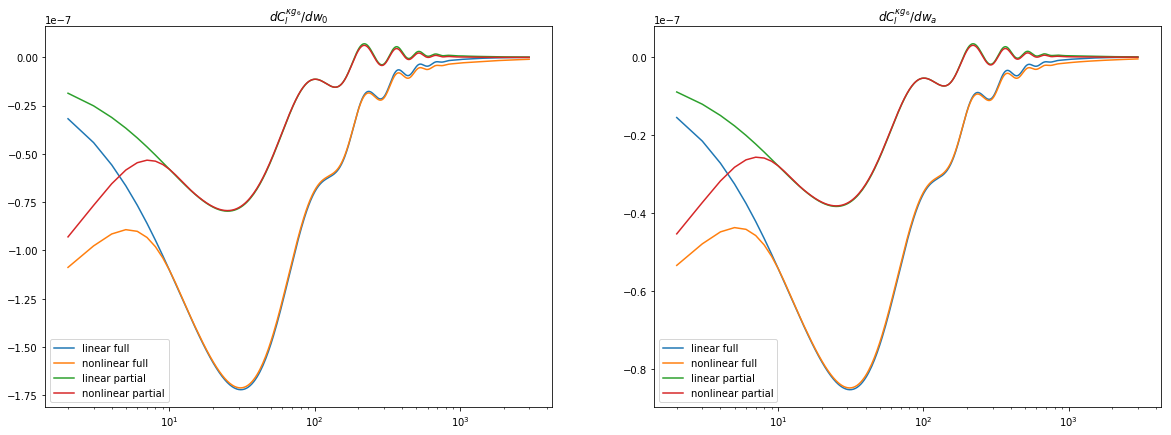

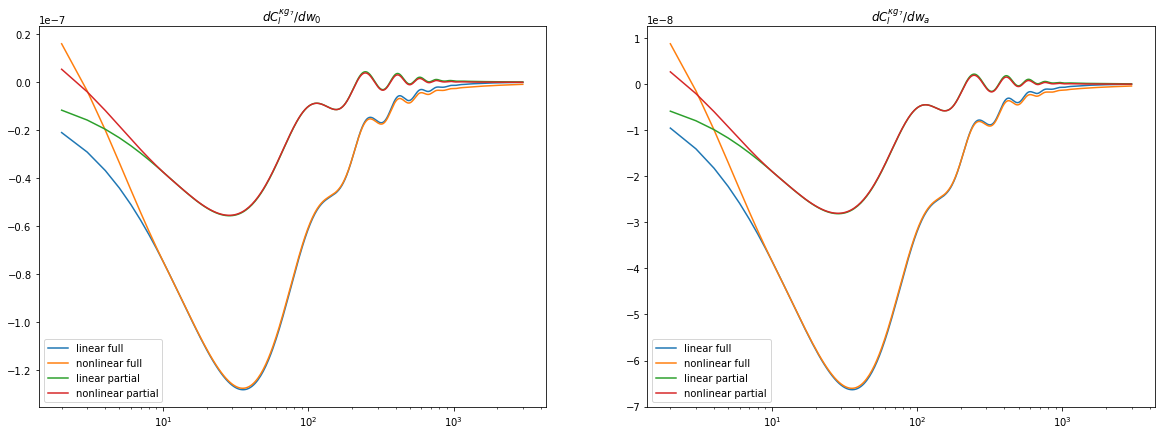

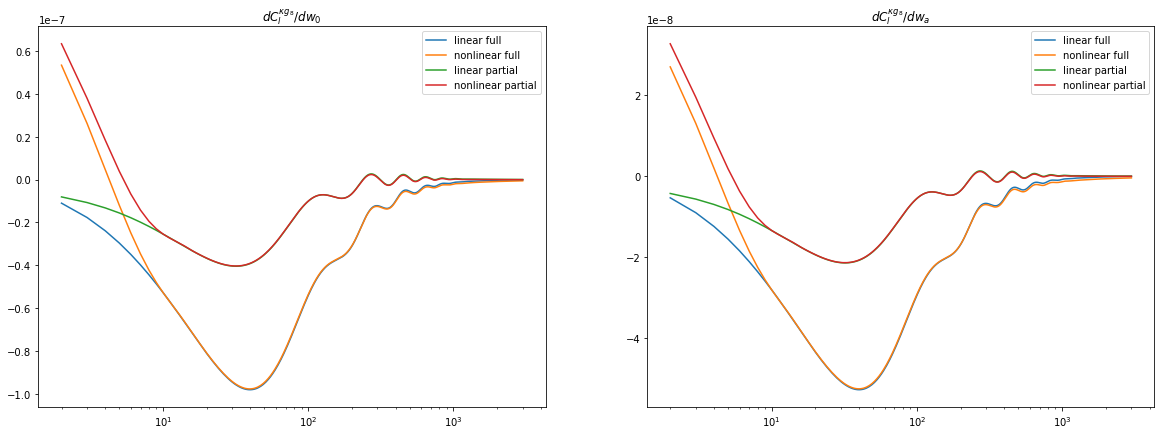

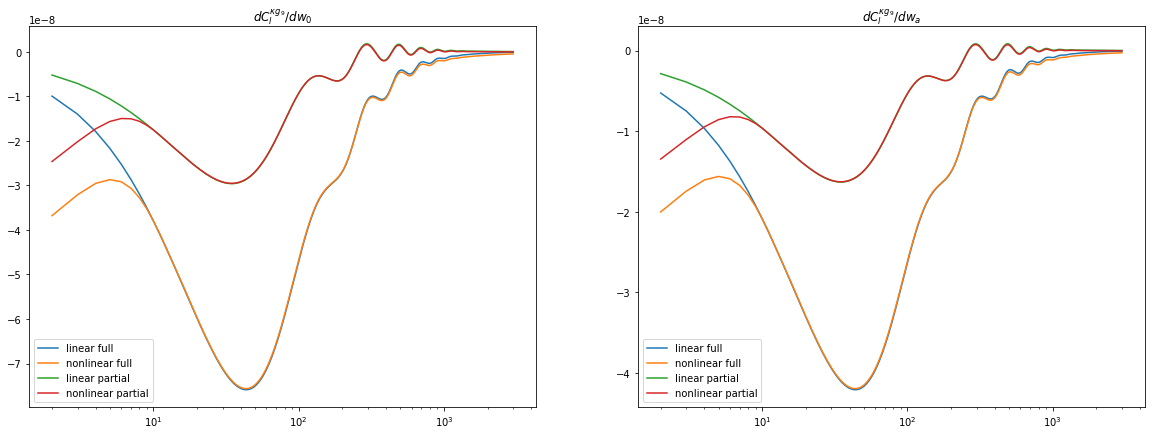

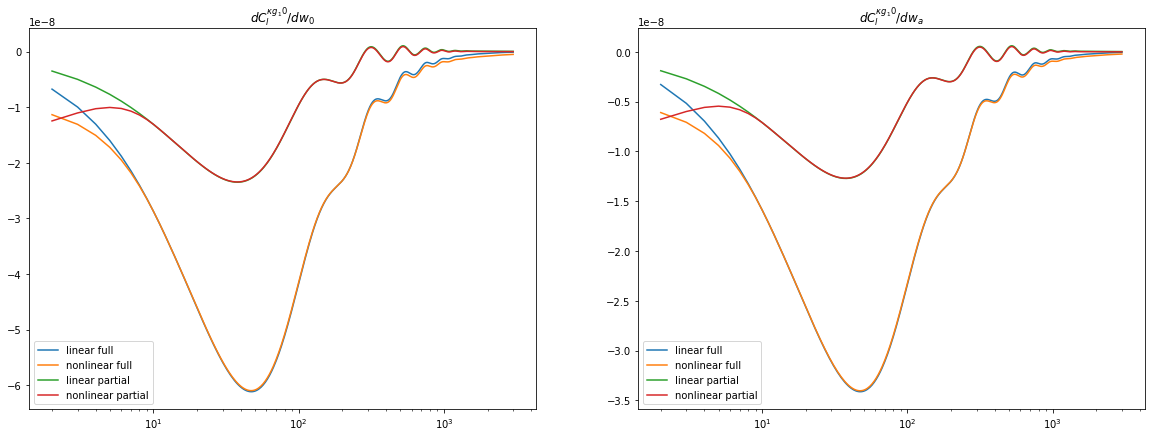

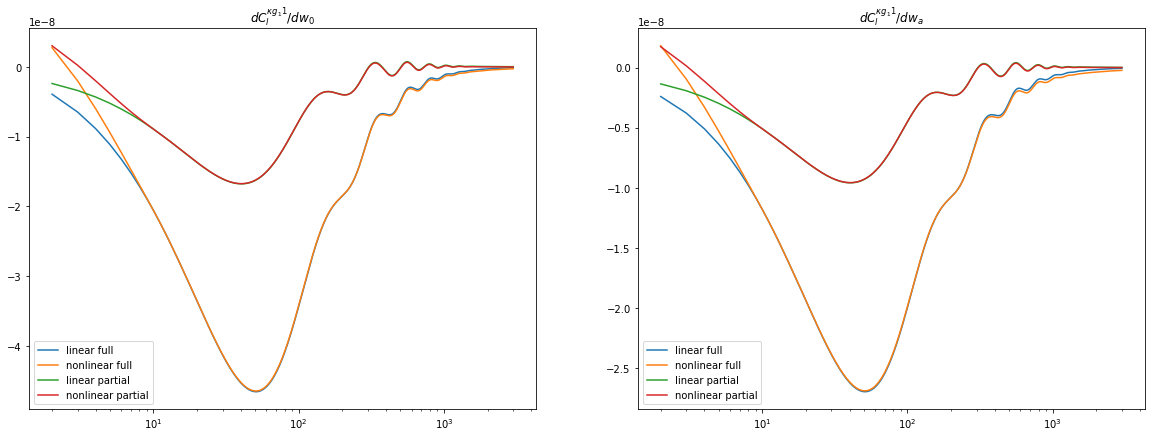

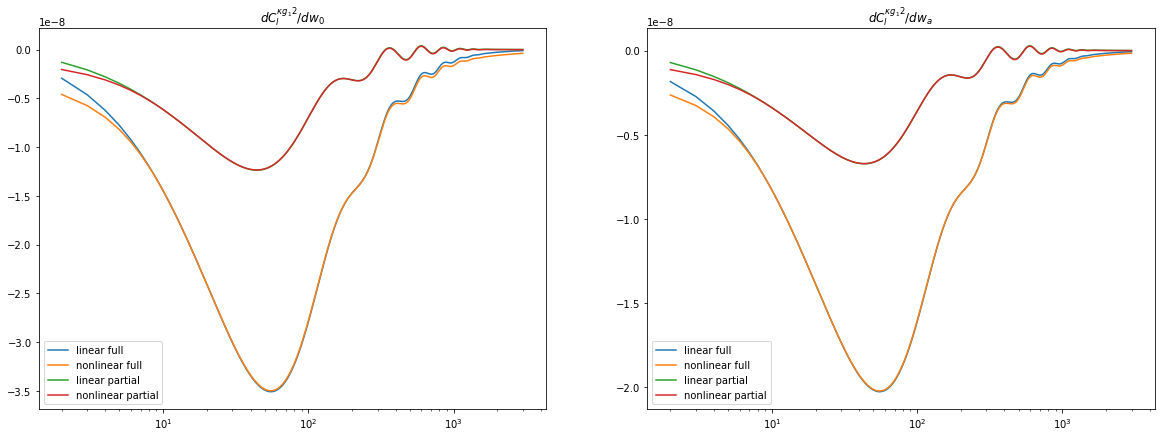

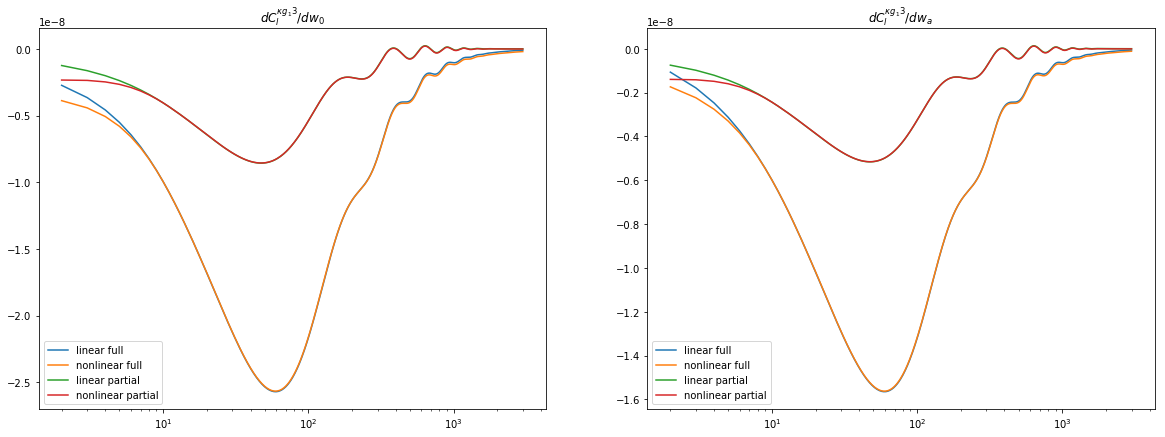

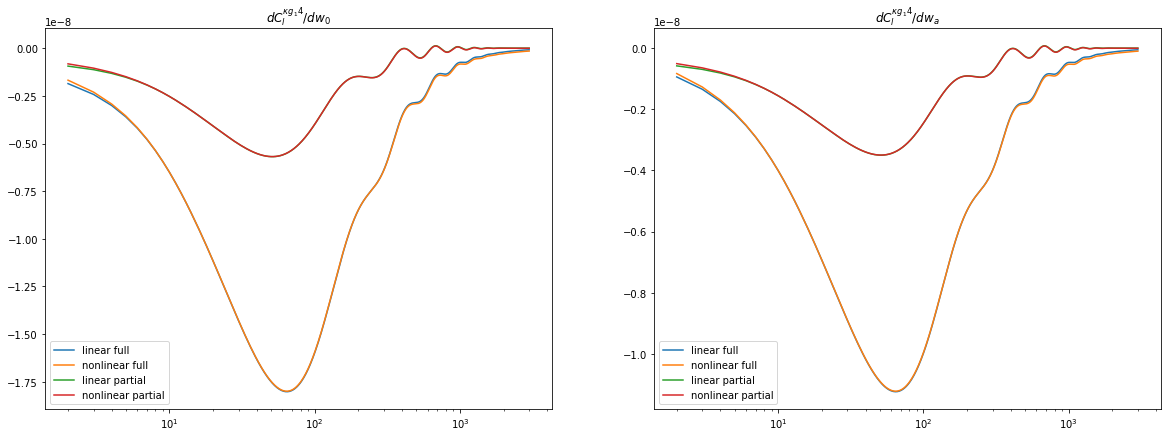

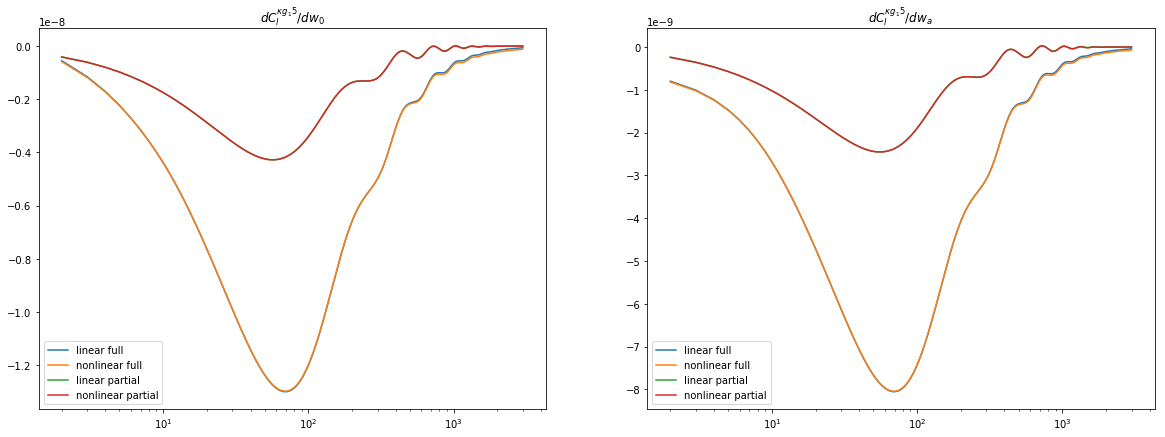

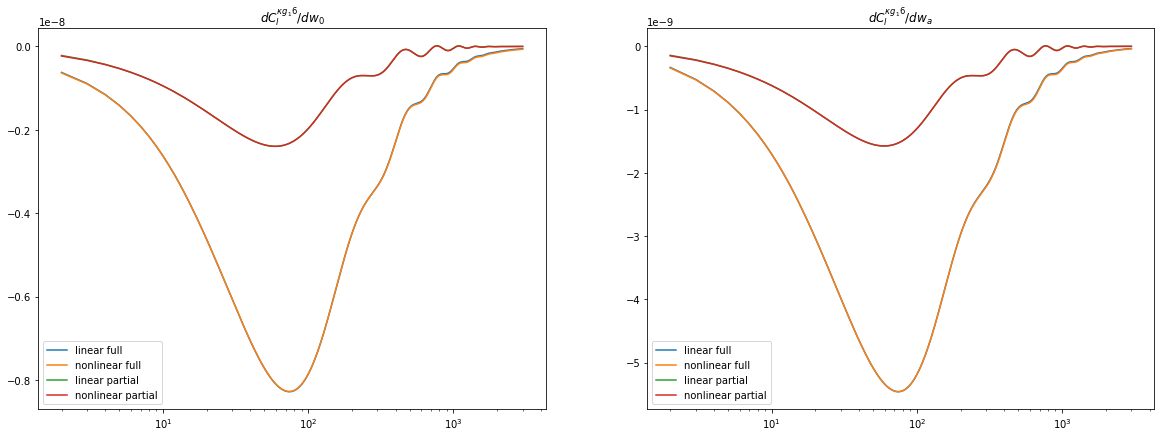

In [19]:
# look at some dCl/dw, dCl/dwa curves
w0Num = 7; waNum = 8
for specNum in range(nToPlot):
    fig = plt.figure(figsize=(20, 7))
    
    plt.subplot(1, 2, 1)
    plt.semilogx(ells,Fobj2.dClVecs[specNum,w0Num],label='linear full')
    plt.semilogx(ells,Fobj4.dClVecs[specNum,w0Num],label='nonlinear full')
    plt.semilogx(ells,dClVecs2[specNum,w0Num],label='linear partial')
    plt.semilogx(ells,dClVecs4[specNum,w0Num],label='nonlinear partial')
    plt.legend()
    plt.title(r'$dC_l^{{\kappa g_{0} }}/dw_0$'.format(specNum))
    #plt.show()
    
    plt.subplot(1, 2, 2)
    plt.semilogx(ells,Fobj2.dClVecs[specNum,waNum],label='linear full')
    plt.semilogx(ells,Fobj4.dClVecs[specNum,waNum],label='nonlinear full')
    plt.semilogx(ells,dClVecs2[specNum,waNum],label='linear partial')
    plt.semilogx(ells,dClVecs4[specNum,waNum],label='nonlinear partial')
    plt.legend()
    plt.title(r'$dC_l^{{\kappa g_{0} }}/dw_a$'.format(specNum))
    plt.show()
    

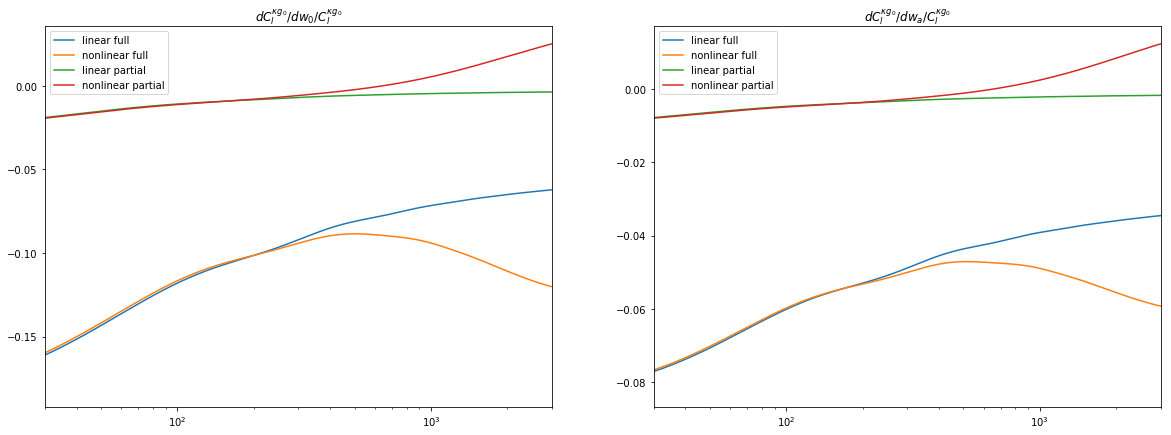

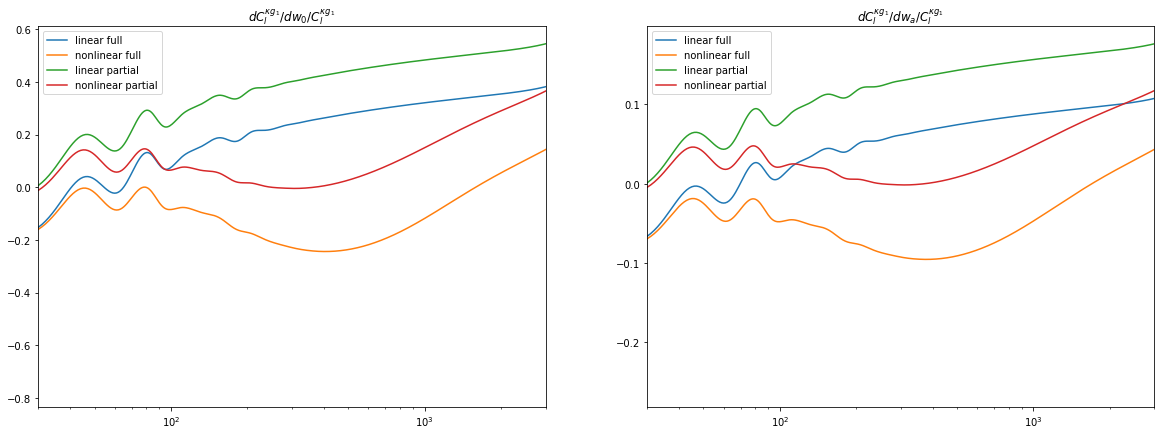

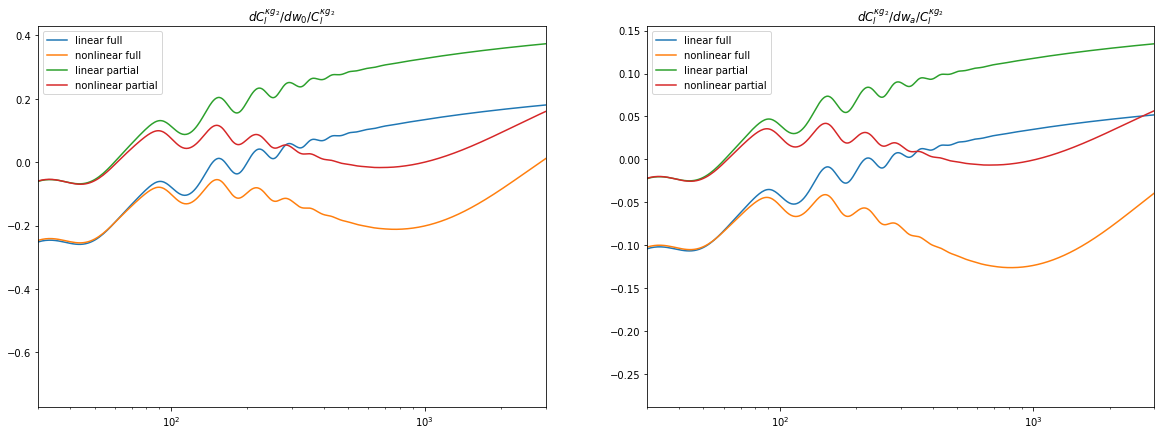

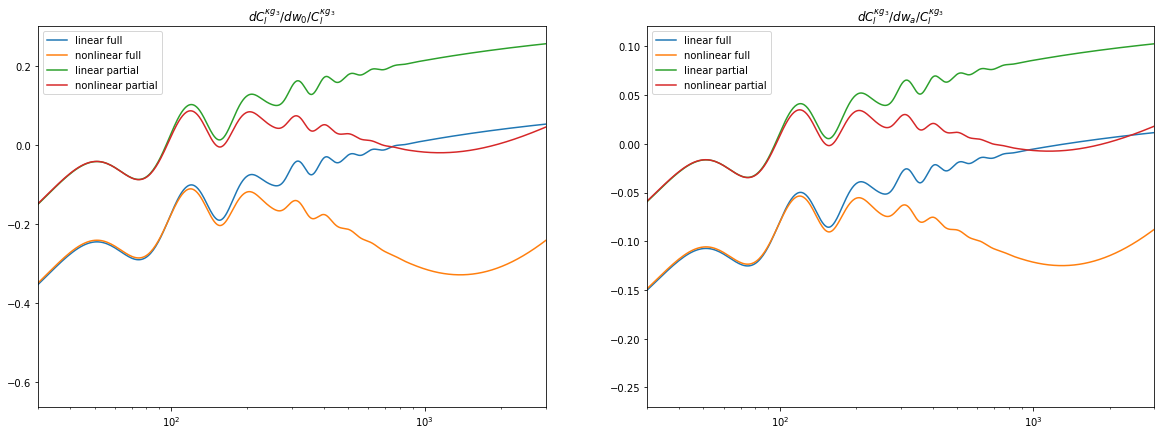

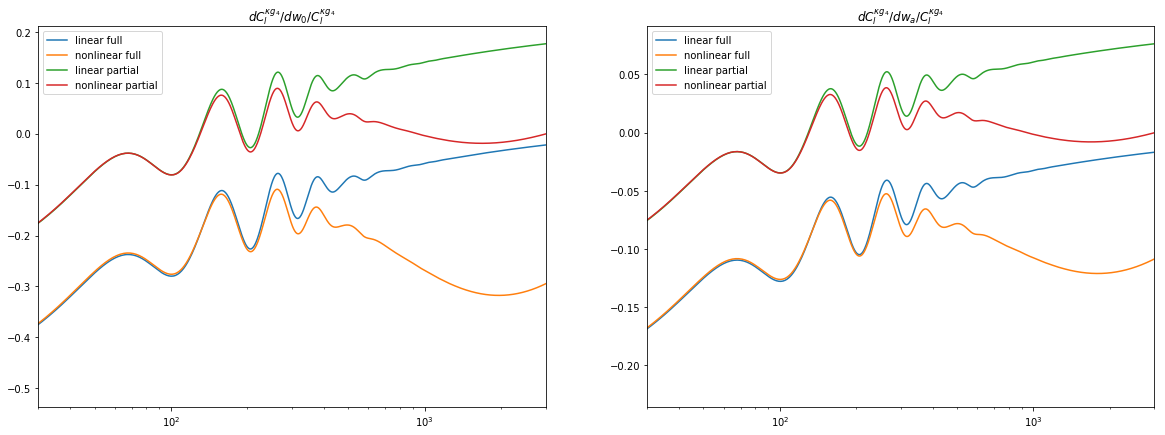

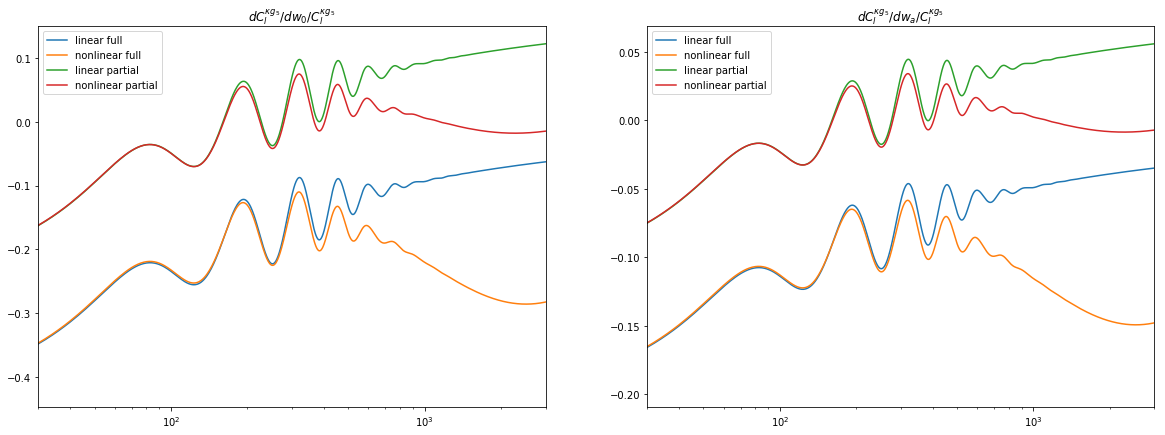

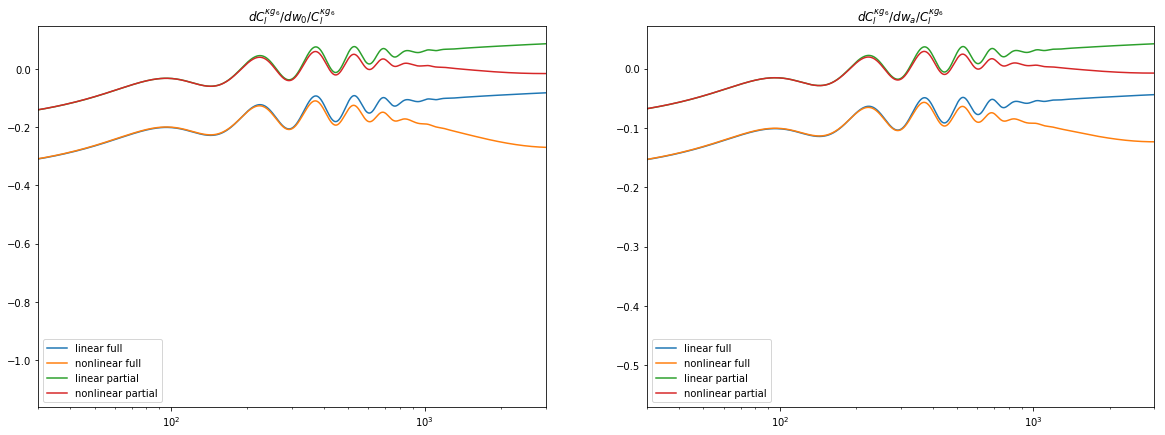

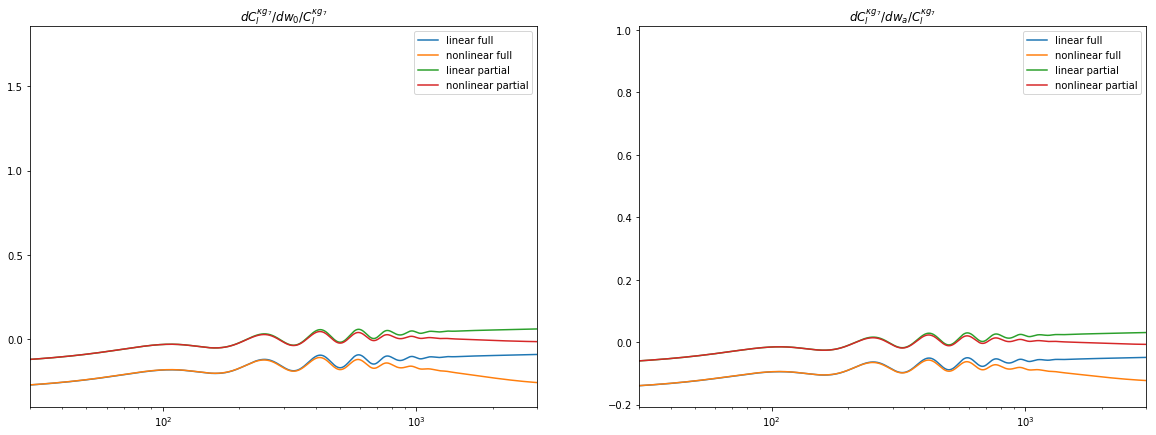

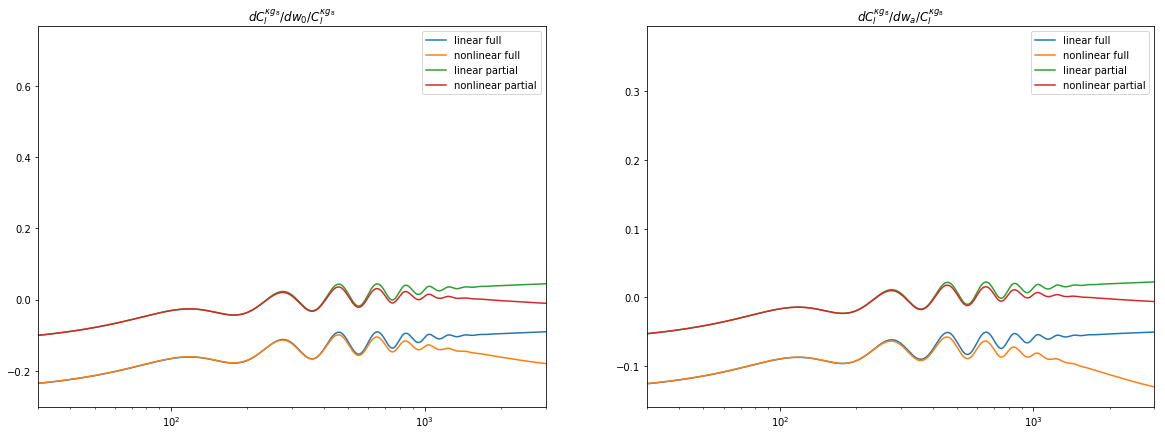

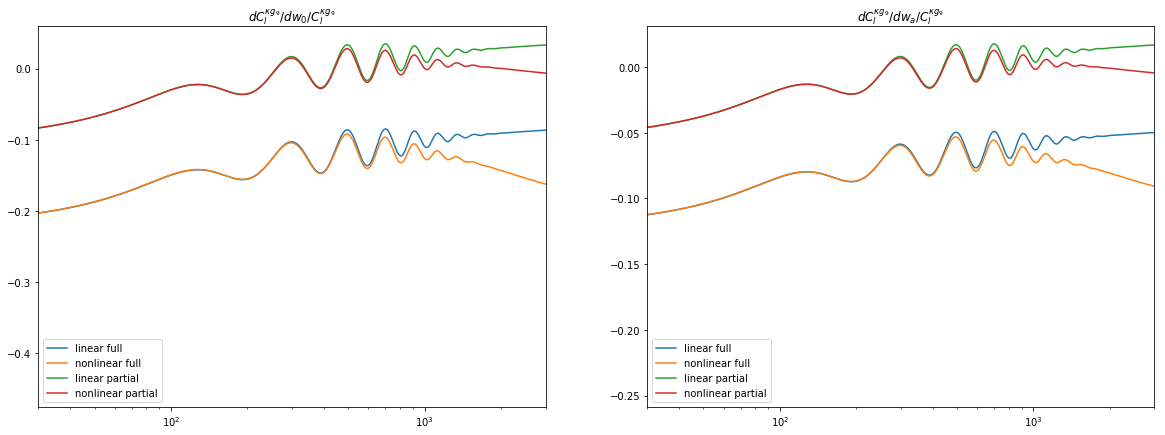

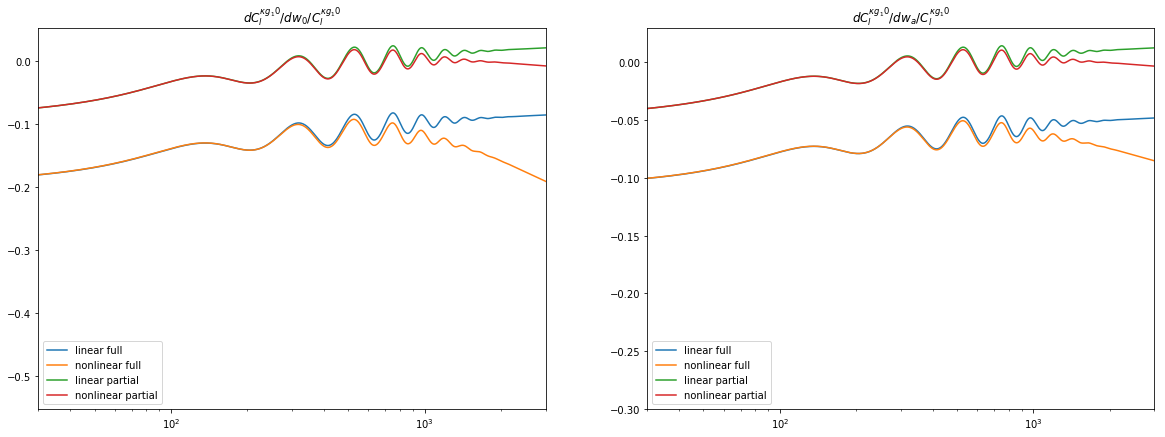

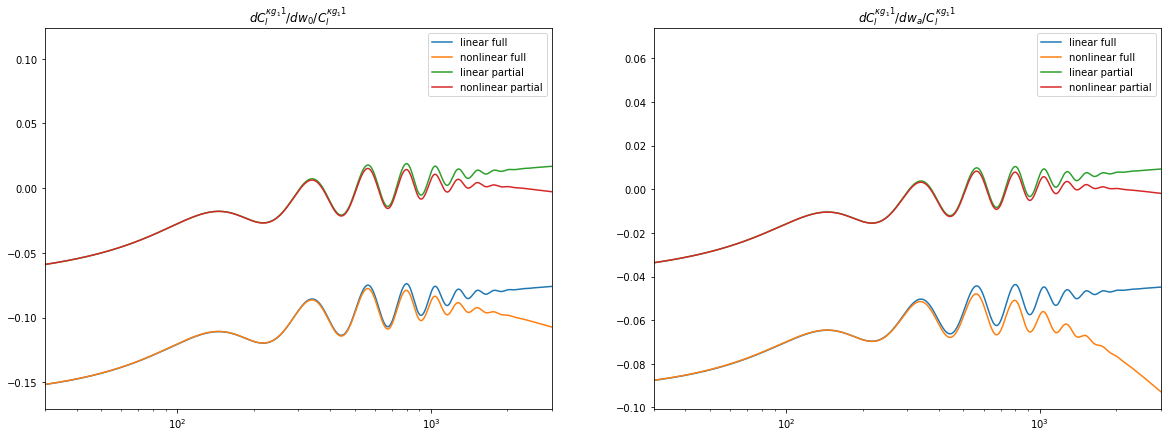

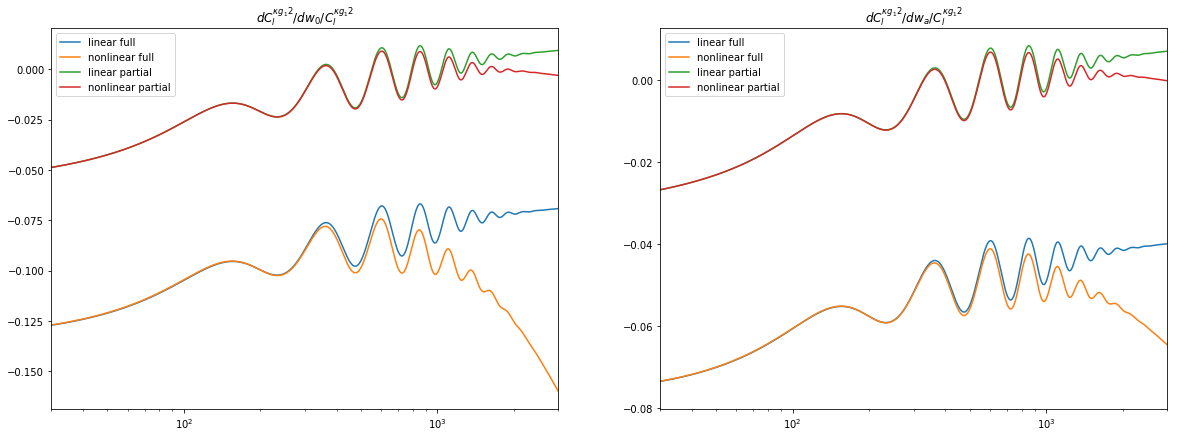

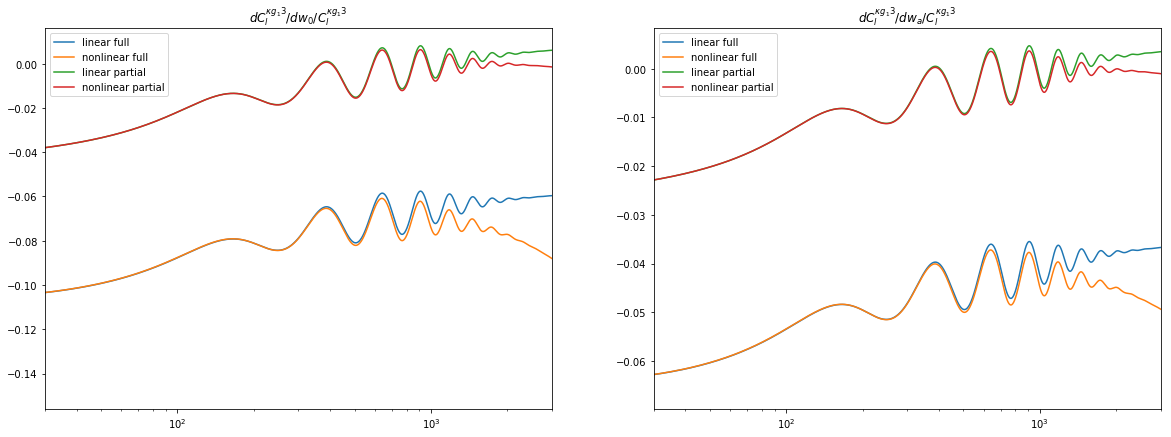

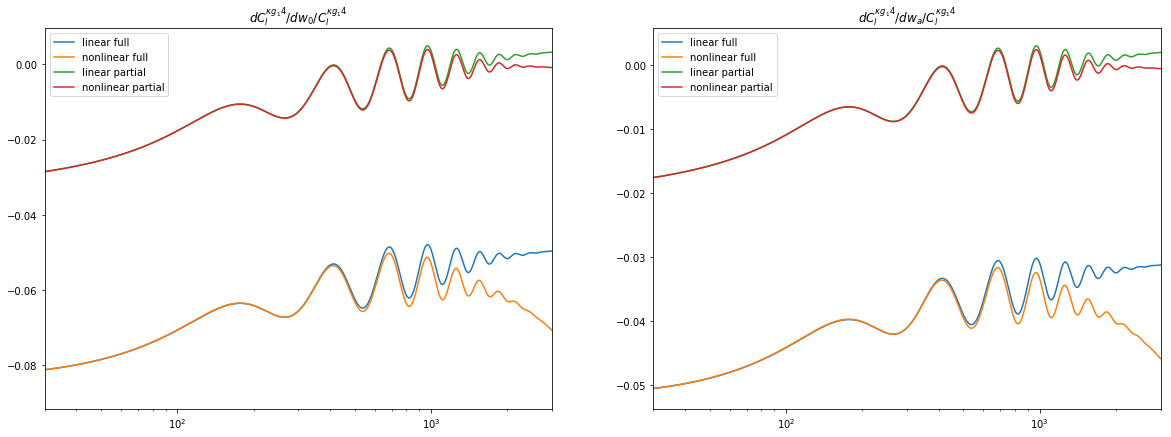

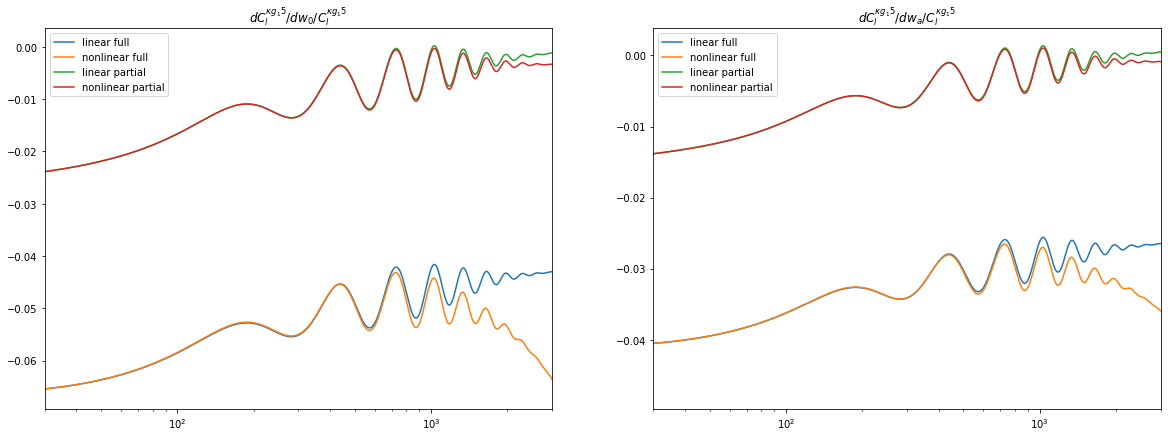

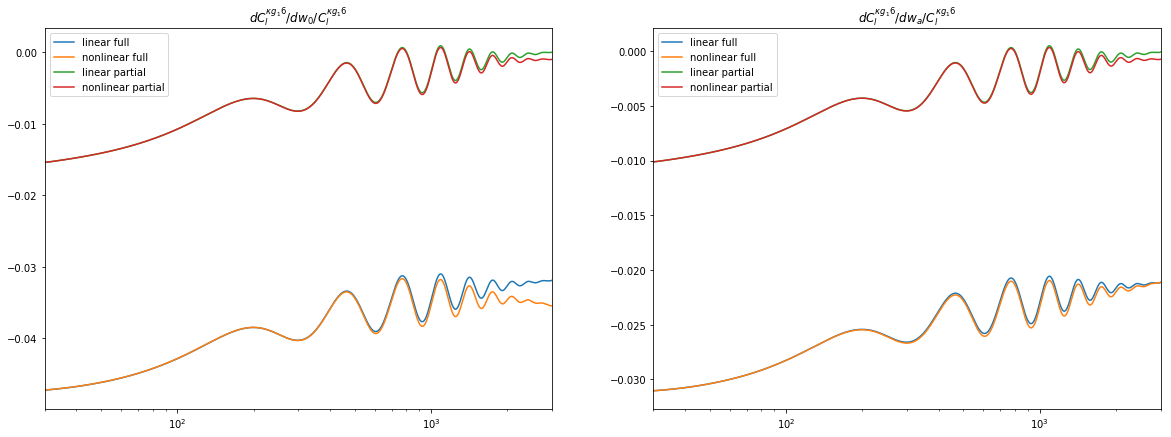

In [20]:
# same but dCl/dw /Cl
# look at some dCl/dw, dCl/dwa curves
w0Num = 7; waNum = 8
for specNum in range(nToPlot):
    fig = plt.figure(figsize=(20, 7))
    
    plt.subplot(1, 2, 1)
    plt.semilogx(ells,Fobj2.dClVecs[specNum,w0Num]/Fobj2.crossCls[0,specNum],label='linear full')
    plt.semilogx(ells,Fobj4.dClVecs[specNum,w0Num]/Fobj4.crossCls[0,specNum],label='nonlinear full')
    plt.semilogx(ells,dClVecs2[specNum,w0Num]/Fobj2.crossCls[0,specNum],label='linear partial')
    plt.semilogx(ells,dClVecs4[specNum,w0Num]/Fobj4.crossCls[0,specNum],label='nonlinear partial')
    plt.legend()
    plt.title(r'$dC_l^{{\kappa g_{0} }}/dw_0 / C_l^{{\kappa g_{0} }}$'.format(specNum))
    plt.xlim([30,3000])
    #plt.show()
    
    plt.subplot(1, 2, 2)
    plt.semilogx(ells,Fobj2.dClVecs[specNum,waNum]/Fobj2.crossCls[0,specNum],label='linear full')
    plt.semilogx(ells,Fobj4.dClVecs[specNum,waNum]/Fobj4.crossCls[0,specNum],label='nonlinear full')
    plt.semilogx(ells,dClVecs2[specNum,waNum]/Fobj2.crossCls[0,specNum],label='linear partial')
    plt.semilogx(ells,dClVecs4[specNum,waNum]/Fobj4.crossCls[0,specNum],label='nonlinear partial')
    plt.legend()
    plt.title(r'$dC_l^{{\kappa g_{0} }}/dw_a / C_l^{{\kappa g_{0} }}$'.format(specNum))
    plt.xlim([30,3000])
    plt.show()
    

In [21]:
# get sigmas from original Fobjs to compare against
Fijkg2 = Fobj2.makeFisher(30)
FijTE2 = Fobj2.makeFisher(30,TE=True)
Fijkg4 = Fobj4.makeFisher(30)
FijTE4 = Fobj4.makeFisher(30,TE=True)
print 'done.'

done.


In [22]:
def getSigmas(Fij):
    return np.sqrt(np.diag(np.linalg.inv(Fij)))
sigmas_kg2 = getSigmas(Fijkg2)
sigmas_TE2 = getSigmas(FijTE2)
sigmas_kg4 = getSigmas(Fijkg4)
sigmas_TE4 = getSigmas(FijTE4)
print 'done.'

done.


In [23]:
print Fobj2.Fij

[[ 5.48322831e+09 -4.64326214e+09  8.74773834e+09 -1.41156504e+17
  -6.01833622e+08  5.19290548e+05  1.52959432e+08  2.84494822e+07
   1.78230623e+07 -2.58715608e+07 -4.13361068e+07 -4.05106302e+07
  -3.60788538e+07 -3.13910220e+07 -2.73930260e+07 -2.37828884e+07
  -2.02861530e+07 -1.70324973e+07 -1.39403586e+07 -1.04131667e+07
  -6.51714028e+06 -3.27607695e+06 -1.03550402e+06 -1.77650512e+05
  -1.52101991e+04]
 [-4.64326214e+09  3.94174128e+09 -8.32907051e+09  1.19324165e+17
   5.11784545e+08 -4.39082252e+05 -1.29108610e+08 -2.42094502e+07
  -1.51285911e+07  2.26844308e+07  3.58023344e+07  3.46121830e+07
   3.06264993e+07  2.65186170e+07  2.29821405e+07  1.98821563e+07
   1.69850330e+07  1.41779485e+07  1.15815679e+07  8.61756588e+06
   5.36389874e+06  2.69625322e+06  8.53682907e+05  1.46874122e+05
   1.31423288e+04]
 [ 8.74773834e+09 -8.32907051e+09  2.45581410e+11 -7.24261870e+16
  -1.28285353e+09  3.02713537e+05  4.17747378e+07  4.06827213e+07
   1.83776401e+07 -1.69542716e+08 -1.7

In [24]:
# Insert new quantities into Fobjs and get new sigmas
Fobj2.crossClsPlus = np.copy(crossClsPlus2)
Fobj2.crossClsMinus = np.copy(crossClsMinus2)
#Fobj2.crossClsPPlus = np.copy(crossClsPPlus2)
#Fobj2.crossClsPMinus = np.copy(crossClsPMinus2)
Fobj2.dClVecs = np.copy(dClVecs2)
#Fobj2.dClVecsP = np.copy(dClVecsP2)

Fobj4.crossClsPlus = np.copy(crossClsPlus4)
Fobj4.crossClsMinus = np.copy(crossClsMinus4)
#Fobj4.crossClsPPlus = np.copy(crossClsPPlus4)
#Fobj4.crossClsPMinus = np.copy(crossClsPMinus4)
Fobj4.dClVecs = np.copy(dClVecs4)
#Fobj4.dClVecsP = np.copy(dClVecsP4)

Fobj2.Fij = Fobj2.makeFisher(30)
#Fobj2.FijTE = Fobj2.makeFisher(30,TE=True)
Fobj4.Fij = Fobj4.makeFisher(30)
#Fobj4.FijTE = Fobj4.makeFisher(30,TE=True)


#sigmas_kg2_new = getSigmas(Fobj2.Fij)
#sigmas_TE2_new = getSigmas(Fobj2.FijTE)
#sigmas_kg4_new = getSigmas(Fobj4.Fij)
#sigmas_TE4_new = getSigmas(Fobj4.FijTE)
print 'done.'


done.


In [25]:
# fix As, ns, tau, since they appear to have had zero derivatives
# define row,col deleting function
def fixParam(Fij,pNum):
    return np.delete(np.delete(Fij,pNum,0),pNum,1)

toDelete = 3 # use this 3 times

Fij_new2 = fixParam(Fobj2.Fij,toDelete)
Fij_new4 = fixParam(Fobj4.Fij,toDelete)
myParamListNew = np.delete(paramList,toDelete,0)

Fij_new2 = fixParam(Fij_new2,toDelete)
Fij_new4 = fixParam(Fij_new4,toDelete)
myParamListNew = np.delete(myParamListNew,toDelete,0)

Fij_new2 = fixParam(Fij_new2,toDelete)
Fij_new4 = fixParam(Fij_new4,toDelete)
myParamListNew = np.delete(myParamListNew,toDelete,0)

print 'done.'

done.


In [26]:
print Fij_new2

[[ 6.41592004e+08  5.22734177e+07  1.67504900e+10 -2.14189618e+06
   4.56843793e+06  1.11562205e+06  7.41105916e+06  1.25057161e+07
   1.26488521e+07  1.14571563e+07  1.00468886e+07  8.58369384e+06
   7.44208170e+06  6.44809595e+06  5.49006146e+06  4.57181787e+06
   3.62080912e+06  2.45666205e+06  1.46586046e+06  6.04430342e+05
   1.46069597e+05  1.66836370e+04]
 [ 5.22734177e+07  9.89117729e+07 -1.32915596e+09  1.28628120e+06
   2.13032794e+06  9.78951388e+05 -2.36963006e+06 -2.83629142e+06
  -1.59193905e+06 -1.89430237e+05  8.27276588e+05  1.56032911e+06
   1.94825557e+06  2.13831728e+06  2.06677091e+06  1.94253630e+06
   1.59647496e+06  1.13858539e+06  6.51101707e+05  2.52665621e+05
   5.71942836e+04  5.52098368e+03]
 [ 1.67504900e+10 -1.32915596e+09  5.14013409e+11 -9.74882494e+07
   6.87598495e+07  3.66766467e+06  2.79058036e+08  4.36855955e+08
   4.07114935e+08  3.31405516e+08  2.58020028e+08  1.99743074e+08
   1.56460684e+08  1.21635534e+08  9.50517267e+07  7.50520885e+07
   5.7

In [27]:
# get sigmas
sigmas_kg2_new = getSigmas(Fij_new2)
sigmas_kg4_new = getSigmas(Fij_new4)
print 'done'

done


In [28]:
# add 999s as place holders
sigmas_kg2_new = np.insert(sigmas_kg2_new,toDelete,[999,999,999])
sigmas_kg4_new = np.insert(sigmas_kg4_new,toDelete,[999,999,999])

In [29]:
# print comparisons
from prettytable import PrettyTable
paramList = Fobj2.paramList

print 'kg linear'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_kg2[i]
    Bi = sigmas_kg2_new[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kg nonlinear'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_kg4[i]
    Bi = sigmas_kg4_new[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

"""
print 'TE linear'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList[:nCosParams]):
    Zi = sigmas_TE2[i]
    Bi = sigmas_TE2_new[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'TE nonlinear'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList[:nCosParams]):
    Zi = sigmas_TE4[i]
    Bi = sigmas_TE4_new[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t
"""

kg linear
+---------------+---------------+------------+---------------+
|   Parameter   | sigmas_before | sigmas_new | percent diff. |
+---------------+---------------+------------+---------------+
|     ombh2     |    0.000741   |   0.0337   |    4.45e+03   |
|     omch2     |    0.00205    |   0.0374   |    1.72e+03   |
| cosmomc_theta |    2.91e-05   |  0.00114   |    3.8e+03    |
|       As      |    2.79e-11   |     999    |    3.58e+15   |
|       ns      |    0.00261    |     999    |    3.83e+07   |
|      tau      |      6.95     |     999    |    1.43e+04   |
|      mnu      |     0.0394    |    0.48    |    1.12e+03   |
|       w       |     0.0795    |   0.0588   |     -26.1     |
|       wa      |      0.23     |   0.158    |       -31     |
|      bin1     |    0.00531    |  0.00112   |     -78.9     |
|      bin2     |    0.00499    |  0.00171   |     -65.7     |
|      bin3     |    0.00557    |  0.00225   |     -59.6     |
|      bin4     |    0.00643    |  0.00202   

'\nprint \'TE linear\'\nt = PrettyTable([\'Parameter\',\'sigmas_before\',\'sigmas_new\',\'percent diff.\'])\nfor i,p in enumerate(paramList[:nCosParams]):\n    Zi = sigmas_TE2[i]\n    Bi = sigmas_TE2_new[i]\n    diff = (Bi-Zi)/Zi *100\n    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )\nprint t\n\nprint \'TE nonlinear\'\nt = PrettyTable([\'Parameter\',\'sigmas_before\',\'sigmas_new\',\'percent diff.\'])\nfor i,p in enumerate(paramList[:nCosParams]):\n    Zi = sigmas_TE4[i]\n    Bi = sigmas_TE4_new[i]\n    diff = (Bi-Zi)/Zi *100\n    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )\nprint t\n'

In [30]:
# check combined kgTE


# FIX THIS.  NEED TO USE FOBJ2.FIJ, FOBJ4.FIJ INSTEAD OF... WAIT, IT LOOKS OK.



def getFijSum(Fijkg,FijTE,nCosParams):
    FijSum = np.copy(Fijkg)
    FijSum[:nCosParams,:nCosParams] += np.copy(FijTE)
    return FijSum

FijSum2 = getFijSum(Fijkg2,FijTE2,nCosParams)
FijSum2_new = getFijSum(Fobj2.Fij,Fobj2.FijTE,nCosParams)
FijSum4 = getFijSum(Fijkg4,FijTE4,nCosParams)
FijSum4_new = getFijSum(Fobj4.Fij,Fobj4.FijTE,nCosParams)

sigmas_sum2 = getSigmas(FijSum2)
sigmas_sum2_new = getSigmas(FijSum2_new)
sigmas_sum4 = getSigmas(FijSum4)
sigmas_sum4_new = getSigmas(FijSum4_new)
print 'done.'

done.


In [31]:
print 'kgTE linear'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_sum2[i]
    Bi = sigmas_sum2_new[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kgTE nonlinear'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_sum4[i]
    Bi = sigmas_sum4_new[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t


kgTE linear
+---------------+---------------+------------+---------------+
|   Parameter   | sigmas_before | sigmas_new | percent diff. |
+---------------+---------------+------------+---------------+
|     ombh2     |    7.17e-06   |  8.45e-06  |      17.9     |
|     omch2     |    0.000198   |  0.000335  |      69.1     |
| cosmomc_theta |    2.77e-07   |  2.4e-07   |     -13.3     |
|       As      |    1.42e-11   |  2.92e-10  |    1.96e+03   |
|       ns      |    0.000786   |  0.000967  |        23     |
|      tau      |     0.0036    |   0.0686   |    1.81e+03   |
|      mnu      |     0.0194    |   0.0227   |      17.5     |
|       w       |     0.0545    |   0.0488   |     -10.4     |
|       wa      |     0.139     |   0.122    |     -12.6     |
|      bin1     |    0.00243    |  0.000901  |     -62.9     |
|      bin2     |    0.00265    |  0.00149   |     -43.6     |
|      bin3     |     0.0032    |   0.0019   |     -40.6     |
|      bin4     |    0.00365    |  0.00192 

In [32]:
# Save the modified Fisher Objects

#filehandler_lin = open('Fisher_7_16O_wa1_pkz.obj','w') # switched to use central chi, outer pzk
filehandler_lin = open('Fisher_7_16O_wa1_chi.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#filehandler_lin = open('Fisher_7_16Opkz.obj','w') # switched to use central chi, outer pzk
#filehandler_lin = open('Fisher_7_16Ochi.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 40
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version

#filehandler_lin = open('Fisher_7_16Nchi.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version

#filehandler_nln = open('Fisher_7_16M_wa1_pzk.obj','w') # switched to use central chi, outer pzk
filehandler_nln = open('Fisher_7_16M_wa1_chi.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#filehandler_nln = open('Fisher_7_16Mpzk.obj','w') # switched to use central chi, outer pzk
#filehandler_nln = open('Fisher_7_16Mchi.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 40
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version

#filehandler_nln = open('Fisher_7_16Ln0chi.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66 ('n0' indicates fix)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version


#filehandler_nln = open('Fisher_7_16Jn0H7.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66 (in FisherCl)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# modified w0,wa derivs to use Halofit ver. 7

#filehandler_nln = open('Fisher_7_16In0H7.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 40 (in FisherCl)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# modified w0,wa derivs to use Halofit ver. 7

#filehandler_lin = open('Fisher_7_16Hn0H7.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66 (in FisherCl)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# modified w0,wa derivs to use Halofit ver. 7

#filehandler_lin = open('Fisher_7_16Gn0H7.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66 (in FisherCl)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# modified w0,wa derivs to use Halofit ver. 7

pickle.dump(Fobj2,filehandler_lin)
pickle.dump(Fobj4,filehandler_nln)
filehandler_lin.close()
filehandler_nln.close()
print 'done.'


done.


In [33]:
# check affect of fixing wa
# define row,col deleting function
def fixParam(Fij,pNum):
    return np.delete(np.delete(Fij,pNum,0),pNum,1)
waIndex = 8

FijSum2_nowa = fixParam(FijSum2,waIndex)
FijSum2_new_nowa = fixParam(FijSum2_new,waIndex)
FijSum4_nowa = fixParam(FijSum4,waIndex)
FijSum4_new_nowa = fixParam(FijSum4_new,waIndex)

sigmas_sum2_nowa = getSigmas(FijSum2_nowa)
sigmas_sum2_new_nowa = getSigmas(FijSum2_new_nowa)
sigmas_sum4_nowa = getSigmas(FijSum4_nowa)
sigmas_sum4_new_nowa = getSigmas(FijSum4_new_nowa)
print 'done.'

done.


In [34]:
paramList = np.delete(paramList,waIndex)
print paramList

['ombh2' 'omch2' 'cosmomc_theta' 'As' 'ns' 'tau' 'mnu' 'w' 'bin1' 'bin2'
 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11' 'bin12'
 'bin13' 'bin14' 'bin15' 'bin16']


In [35]:
print 'kgTE linear, wa fixed'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_sum2_nowa[i]
    Bi = sigmas_sum2_new_nowa[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kgTE nonlinear, wa fixed'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_sum4_nowa[i]
    Bi = sigmas_sum4_new_nowa[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t


kgTE linear, wa fixed
+---------------+---------------+------------+---------------+
|   Parameter   | sigmas_before | sigmas_new | percent diff. |
+---------------+---------------+------------+---------------+
|     ombh2     |    7.17e-06   |  8.4e-06   |      17.3     |
|     omch2     |    0.000177   |  0.000312  |      76.5     |
| cosmomc_theta |    2.58e-07   |  2.4e-07   |      -7.1     |
|       As      |    1.39e-11   |  2.92e-10  |     2e+03     |
|       ns      |    0.000768   |  0.000948  |      23.6     |
|      tau      |    0.00351    |   0.0686   |    1.85e+03   |
|      mnu      |     0.0185    |   0.0201   |      8.67     |
|       w       |     0.0123    |   0.0101   |     -17.7     |
|      bin1     |    0.00235    |  0.000857  |     -63.5     |
|      bin2     |     0.0026    |  0.000649  |       -75     |
|      bin3     |    0.00301    |  0.000843  |       -72     |
|      bin4     |    0.00345    |  0.00112   |     -67.5     |
|      bin5     |    0.00392    |